## ECG 데이터 수집

- NeuroKit2 라이브러리를 사용한 ECG 신호 생성

In [ ]:
# NeuroKit2와 pandas 라이브러리 임포트
import neurokit2 as nk
import numpy as np
import pandas as pd  

# ECG 데이터 생성
ecg_simulate = nk.ecg_simulate(
    duration=10,        # 10초간 데이터 생성
    heart_rate=70,      # 심박수 70bpm
    noise=0.1,          # 노이즈 정도
    random_state=42     # 재현성을 위한 시드값
)

# ECG 데이터 유형 확인
type(ecg_simulate)

numpy.ndarray

- ECG 신호 시각화

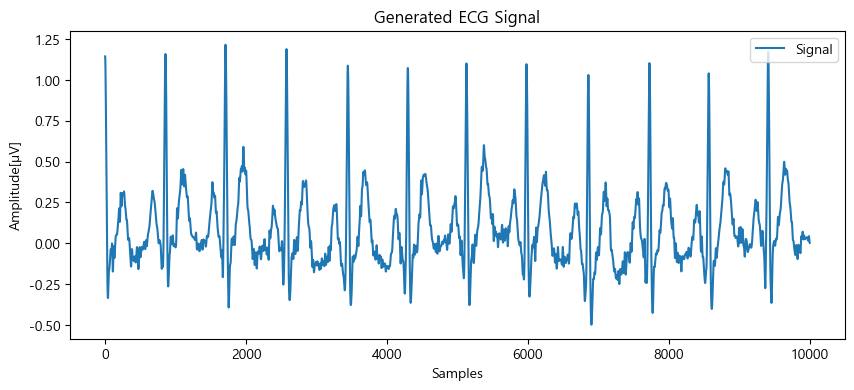

In [ ]:
import matplotlib.pyplot as plt

#그래프 크기 설정 [width, height](inces)
plt.rcParams['figure.figsize']=[10, 4]

# ECG 데이터 플롯
nk.signal_plot(ecg_simulate)

# 제목, 축이름 추가, 그래프 출력
plt.title("Generated ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude[μV]")
plt.show()

## ECG 전처리

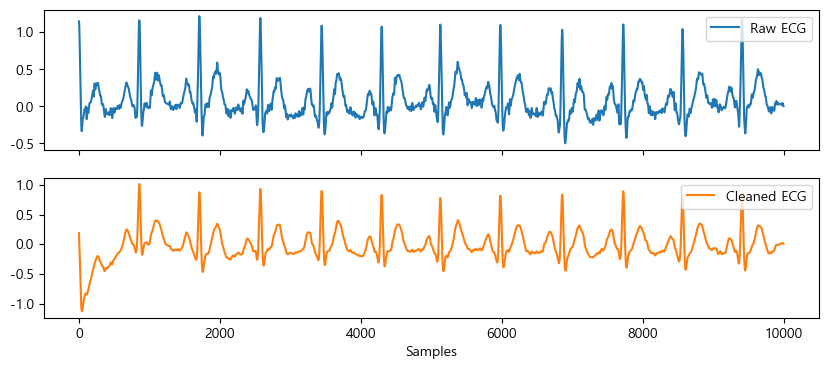

In [ ]:
ecg_cleaned = nk.ecg_clean(
    ecg_simulate,
    sampling_rate=1000,
    method="neurokit"
)

# ECG 데이터 플롯
nk.signal_plot(
    [ecg_simulate, ecg_cleaned],
    labels=["Raw ECG", "Cleaned ECG"],
    subplots=True
)


## R-peak 검출

In [ ]:
# 정제된 이후의 신호는 시작 부분이 왜곡이 발생하므로 시작 부분을 제거
ecg_cleaned = ecg_cleaned[1000:]

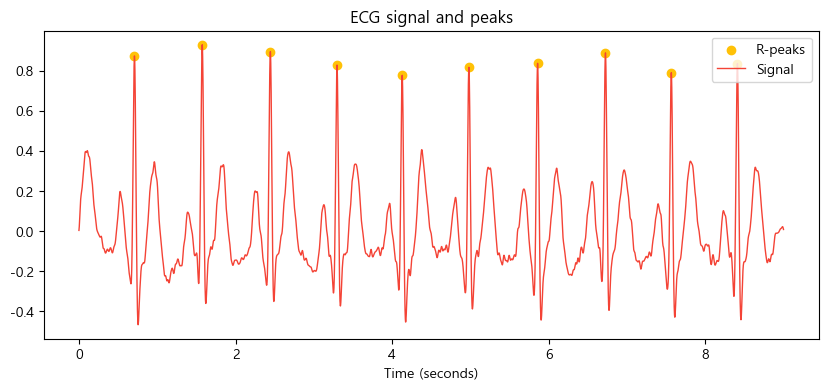

In [ ]:
rpeaks_instances, rpeaks_info = nk.ecg_peaks(
    ecg_cleaned,
    sampling_rate=1000,
    correct_artifacts=True,
    show=True
)

In [ ]:
rpeaks_instances

,ECG_R_Peaks
0,0
1,0
2,0
3,0
4,0
...,...
8995,0
8996,0
8997,0
8998,0


In [ ]:
# 반환된 신호 데이터 중에서 R-peak만 추출
rpeaks_instances[rpeaks_instances["ECG_R_Peaks"]!=0]

,ECG_R_Peaks
709,1
1575,1
2445,1
3296,1
4129,1
4981,1
5858,1
6725,1
7566,1
8410,1


In [ ]:
rpeaks_info

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([ 709, 1575, 2445, 3296, 4129, 4981, 5858, 6725, 7566, 8410]),
 'ECG_R_Peaks_Uncorrected': array([ 709, 1575, 2445, 3296, 4129, 4981, 5858, 6725, 7566, 8410]),
 'ECG_fixpeaks_ectopic': [],
 'ECG_fixpeaks_missed': [],
 'ECG_fixpeaks_extra': [],
 'ECG_fixpeaks_longshort': [],
 'ECG_fixpeaks_method': 'kubios',
 'ECG_fixpeaks_rr': array([0.85566667, 0.866     , 0.87      , 0.851     , 0.833     ,
        0.852     , 0.877     , 0.867     , 0.841     , 0.844     ]),
 'ECG_fixpeaks_drrs': array([-0.03693152,  0.29439696,  0.11396011, -0.54131054, -0.51282051,
         0.54131054,  0.71225071, -0.28490028, -0.74074074,  0.08547009]),
 'ECG_fixpeaks_mrrs': array([ 0.06662629,  0.37552998,  0.33313144, -0.33918837, -1.5142338 ,
        -0.13325257,  0.90854028,  0.56329497, -0.72683222, -0.29073289]),
 'ECG_fixpeaks_s12': array([ 0.29439696,  0.11396011,  0.29439696, -0.51282051, -0.54131054,
         0.71225071,  0.

## 파형 검출

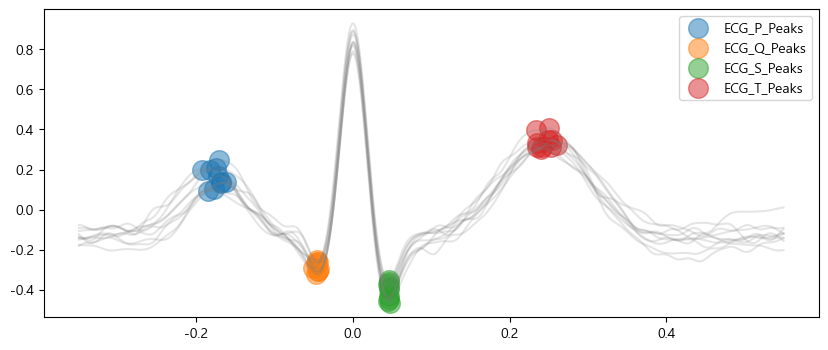

In [ ]:
waves_data, waves = nk.ecg_delineate(
    ecg_cleaned,            # 정제된 신호 데이터
    rpeaks=rpeaks_info,     # R-peak 위치
    sampling_rate=1000,     # 샘플링 주파수
    show=True,              # 플롯 출력
    show_type='peaks'       # 모든 피크를 표시
)

In [ ]:
# 각 파형의 피크, 시작, 끝 위치
waves_data.head()

,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
waves

{'ECG_P_Peaks': [526, 1390, 2252, 3127, 3966, 4809, 5683, 6554, 7397, 8232],
 'ECG_P_Onsets': [462, 1316, 2190, 3043, 3883, 4716, 5617, 6443, 7309, 8174],
 'ECG_P_Offsets': [661, 1477, 2263, 3195, 4003, 4871, 5807, 6607, 7513, 8312],
 'ECG_Q_Peaks': [664, 1529, 2397, 3251, 4085, 4936, 5811, 6679, 7515, nan],
 'ECG_R_Onsets': [529, 1507, 2277, 3219, 4059, 4898, 5779, 6654, 7469, nan],
 'ECG_R_Offsets': [793, 1649, 2516, 3370, 4204, 5059, 5932, 6799, 7638, 8483],
 'ECG_S_Peaks': [756, 1621, 2490, 3340, 4173, 5026, 5903, 6771, 7611, nan],
 'ECG_T_Peaks': [962, 1835, 2678, 3531, 4379, 5233, 6099, 6964, 7814, 8644],
 'ECG_T_Onsets': [942, 1782, 2631, 3424, 4273, 5136, 6002, 6846, 7683, 8575],
 'ECG_T_Offsets': [1093, 1912, 2813, 3649, 4484, 5240, 6249, 7045, 7910, 8656]}

## 심박수 계산

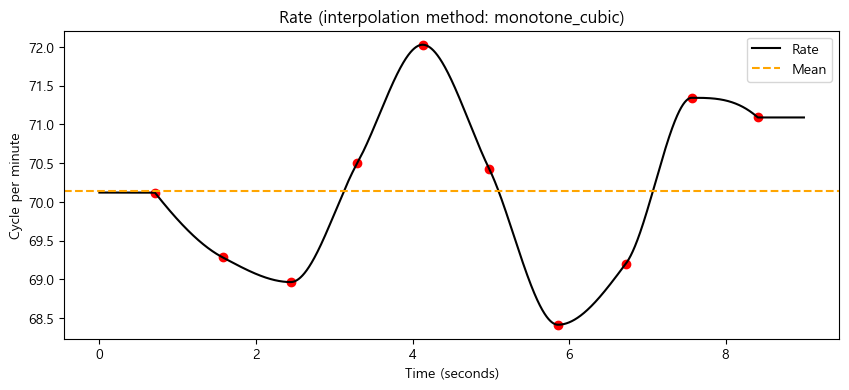

In [ ]:
rate = nk.signal_rate(
    peaks=rpeaks_info["ECG_R_Peaks"],       # R-peak 위치
    sampling_rate=1000,                     # 샘플링 주파수
    desired_length=len(ecg_cleaned),        # 신호 길이
    interpolation_method="monotone_cubic",  # 보간 방법
    show=True                               # 플롯 출력
)

## ECG 신호 품질 평가

In [ ]:
# ECG 품질 지수 계산
quality = nk.ecg_quality(
    ecg_cleaned,
    rpeaks=rpeaks_info["ECG_R_Peaks"],
    sampling_rate=1000,
    method='averageQRS'
)

quality


array([0.02861104, 0.02861104, 0.02861104, ..., 0.        , 0.        ,
       0.        ])

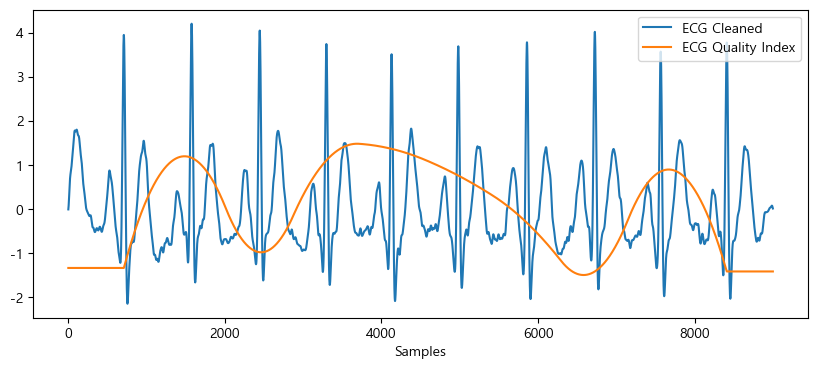

In [ ]:
# 품질 지수 플롯
nk.signal_plot(
    [ecg_cleaned, quality],
    labels=["ECG Cleaned", "ECG Quality Index"],
    standardize=True
)

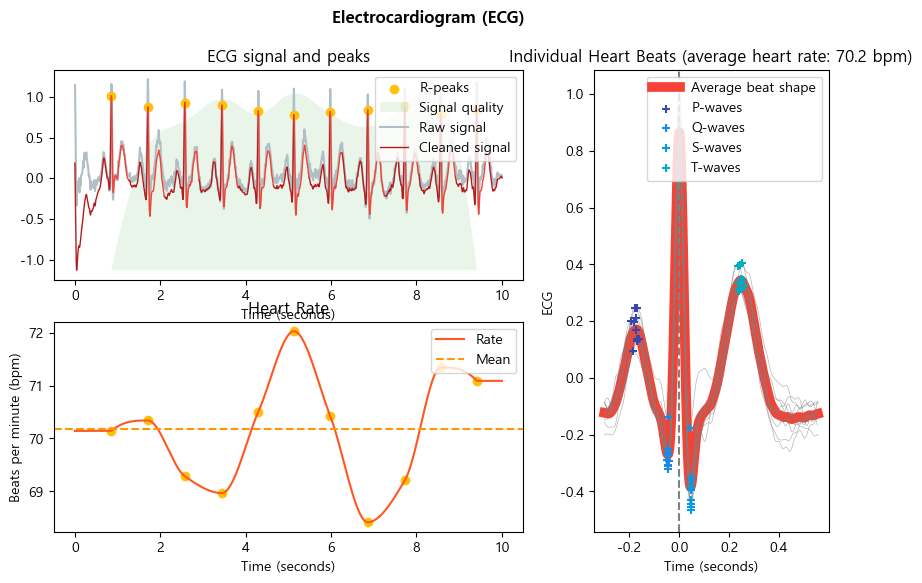

In [ ]:
# 전처리 파이프라인을 통한 ECG 데이터 처리
ecg_signals, info = nk.ecg_process(
    ecg_simulate,                   # 신호 데이터
    sampling_rate=1000,             # 샘플링 주파수
    method="neurokit"               # 전처리 방법
)

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = [10, 6]

# 통합된 ECG 데이터 플롯
nk.ecg_plot(ecg_signals, info);

In [ ]:
ecg_signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,1.144713,0.185982,70.142623,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,1.140385,0.154798,70.142623,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,1.130545,0.123352,70.142623,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,1.115027,0.091415,70.142623,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,1.093818,0.058787,70.142623,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.014362,0.014388,71.090047,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9996,0.009472,0.012758,71.090047,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9997,0.005616,0.011069,71.090047,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
9998,0.003197,0.009346,71.090047,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [ ]:
info

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([ 856, 1709, 2575, 3445, 4296, 5129, 5981, 6858, 7725, 8566, 9410],
       dtype=int64),
 'ECG_R_Peaks_Uncorrected': array([ 856, 1709, 2575, 3445, 4296, 5129, 5981, 6858, 7725, 8566, 9410]),
 'ECG_fixpeaks_ectopic': [],
 'ECG_fixpeaks_missed': [],
 'ECG_fixpeaks_extra': [],
 'ECG_fixpeaks_longshort': [],
 'ECG_fixpeaks_method': 'kubios',
 'ECG_fixpeaks_rr': array([0.8554, 0.853 , 0.866 , 0.87  , 0.851 , 0.833 , 0.852 , 0.877 ,
        0.867 , 0.841 , 0.844 ]),
 'ECG_fixpeaks_drrs': array([-0.02828784, -0.05955335,  0.32258065,  0.09925558, -0.47146402,
        -0.44665012,  0.47146402,  0.62034739, -0.24813896, -0.64516129,
         0.07444169]),
 'ECG_fixpeaks_mrrs': array([ 0.03308519,  0.        ,  0.32533774,  0.40253653, -0.17645437,
        -1.10283981, -0.027571  ,  0.68927488,  0.42735043, -0.55141991,
        -0.22056796]),
 'ECG_fixpeaks_s12': array([-0.05955335, -0.02828784,  0.09925558,  0.32258

In [ ]:
# 전처리 파이프라인 함수 정의
def ecg_process_ha(ecg_signal):

    # 노이즈 제거
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit')[1000:]
    rpeaks_instances, rpeaks_info = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks_info["ECG_R_Peaks"], sampling_rate=1000, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks_info["ECG_R_Peaks"], sampling_rate=1000)

    # 출력할 데이터프레임 생성
    signals = pd.DataFrame({
        "ECG_Raw": ecg_signal[1000:],
        "ECG_Clean": ecg_cleaned,
        "ECG_Rate": rate,
        "ECG_Quality": quality
    })

    signals = pd.concat([signals, rpeaks_instances], axis=1)

    # Create info dict
    info = rpeaks_info
    info["sampling_rate"] = 1000

    return signals, info


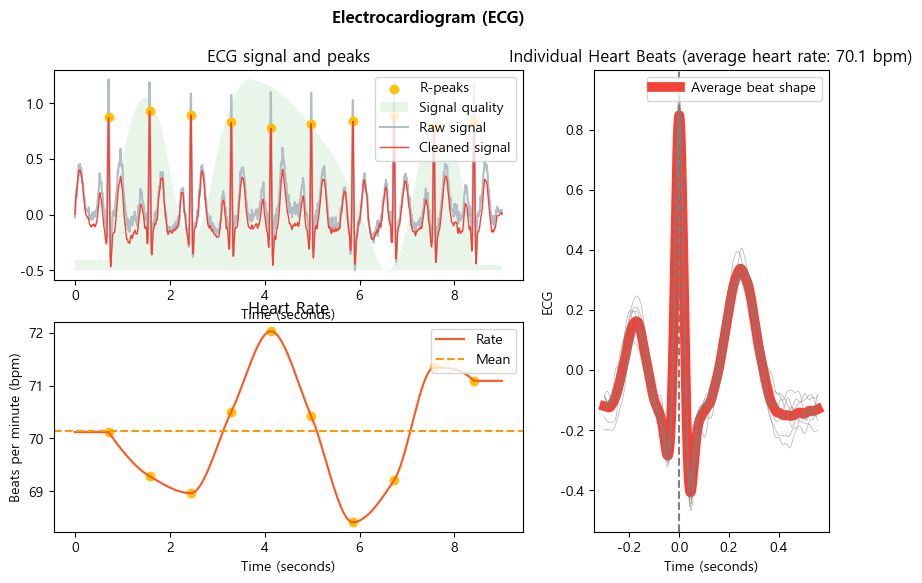

In [ ]:
# ECG 전처리 수행
signals, info = ecg_process_ha(ecg_simulate)

# ECG 데이터 플롯
nk.ecg_plot(signals, info)

In [ ]:
import neurokit2 as nk

# 샘플 데이터 로드
df = nk.data("bio_resting_5min_100hz")

# 데이터 정보 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ECG     30000 non-null  float64
 1   PPG     30000 non-null  float64
 2   RSP     30000 non-null  float64
dtypes: float64(3)
memory usage: 703.3 KB


In [ ]:
# 데이터 확인
df.head()

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


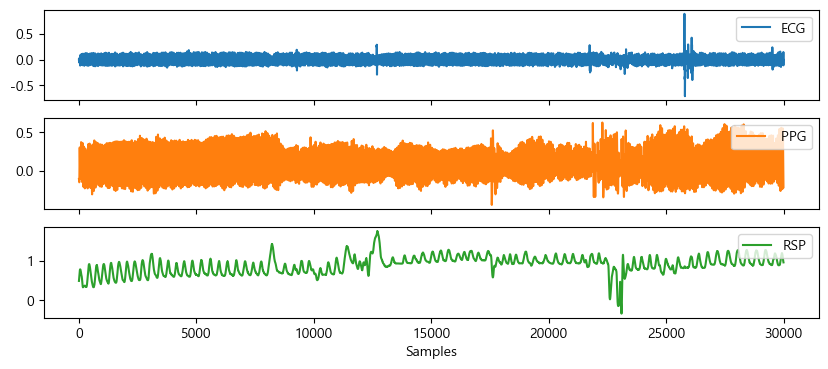

In [ ]:
# 데이터 시각화
plt.rcParams['figure.figsize'] = [10, 4]
nk.signal_plot(df, subplots=True, labels=["ECG", " PPG", "RSP"])

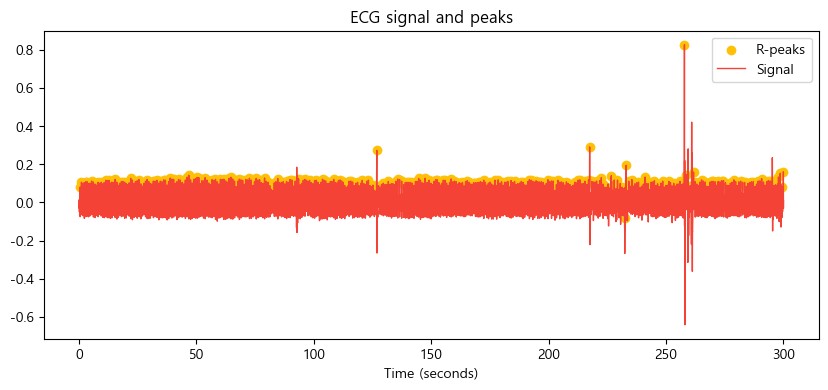

In [ ]:
# ECG 데이터 추출
ecg_signal = df["ECG"]

# 노이즈 제거
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=100, method="neurokit")

# R-peak 검출
rpeaks_instances, rpeaks_info = nk.ecg_peaks(ecg_cleaned, sampling_rate=100, show=True)

# R-peak 위치 저장
rpeaks = rpeaks_info["ECG_R_Peaks"]

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50
0,696.372093,64.777555,76.484531,15.116279


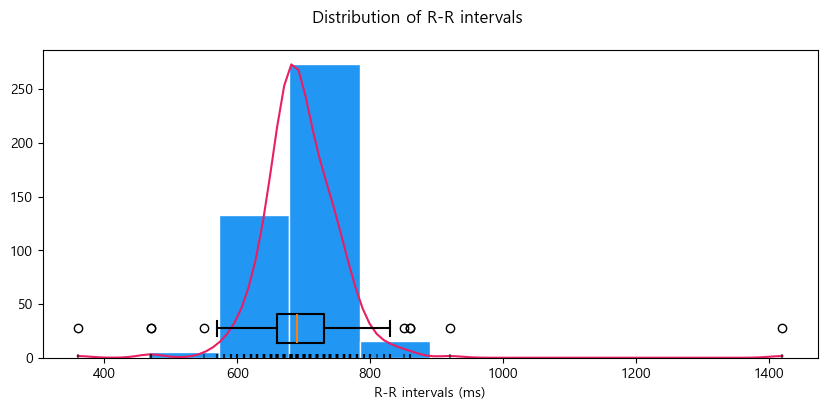

In [ ]:
# 시간 영역 분석
hrv_time = nk.hrv_time(rpeaks, sampling_rate=100, show=True)

# 사간 영역 분석 결과
hrv_time[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50']]

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,0.017393,0.048824,0.064269,0.013135,0.143621,0.759686,0.339952,0.447491,-2.744677


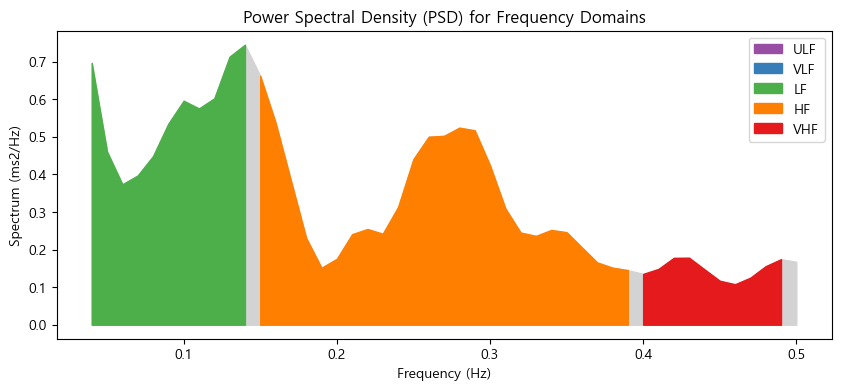

In [ ]:
# 주파수 영역 분석
hrv_freq = nk.hrv_frequency(rpeaks, sampling_rate=100, show=True, normalize=True)

hrv_freq

In [ ]:
# 주파수 영역 분석 결과
hrv_freq[['HRV_TP', 'HRV_VLF', 'HRV_HF', 'HRV_LFHF']]

,HRV_TP,HRV_VLF,HRV_HF,HRV_LFHF
0,0.143621,0.017393,0.064269,0.759686


,HRV_SD1,HRV_SD2,HRV_SD1SD2
0,54.145713,73.792275,0.733759


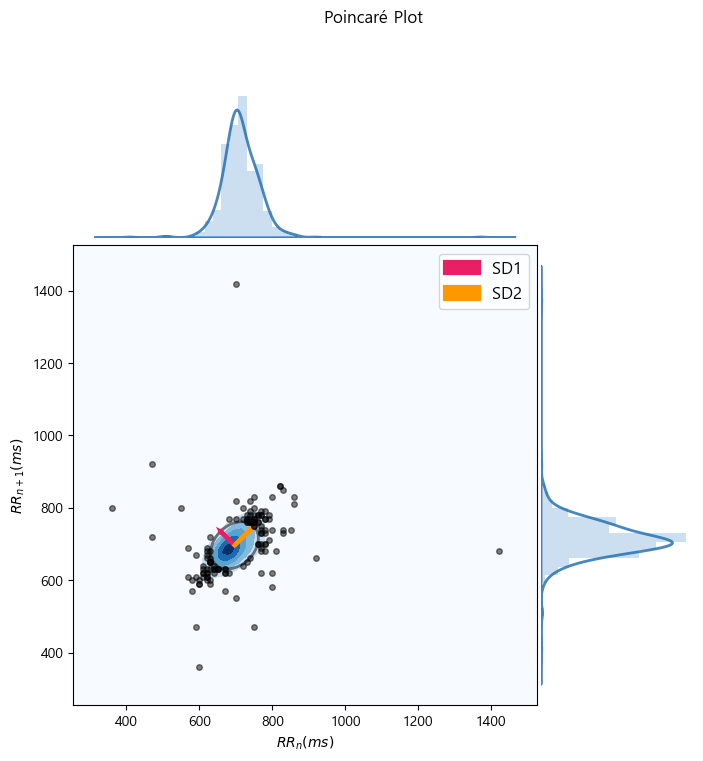

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]

# 푸엥카레 플롯을 통한 비선형 영역 분석
hrv_nonlinear = nk.hrv_nonlinear(rpeaks, sampling_rate=100, show=True)

# 비선형 영역 분석 결과
hrv_nonlinear[['HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2']]

## + 심박수 통계 및 품질 시각화 추가

- 평균 심박수 및 품질 지수의 시각화를 통해 ECG 데이터의 전반적 특성을 보여줌.

평균 심박수: 74.80 bpm


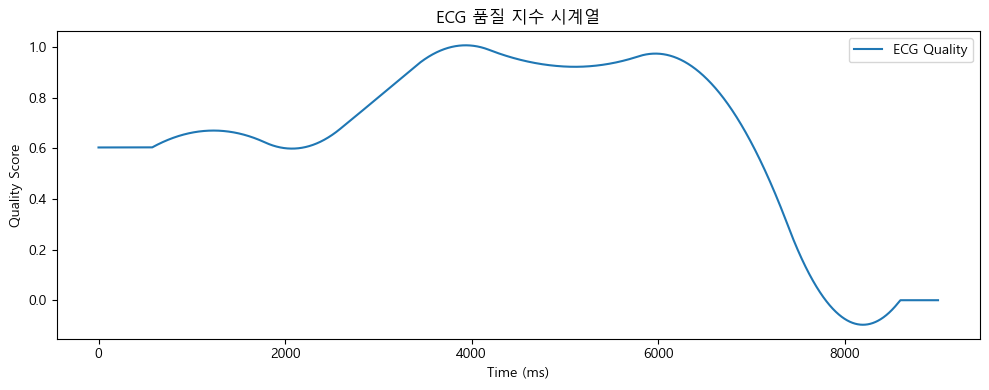

In [ ]:
# ECG 샘플 시계열 데이터 생성 (시뮬레이션용)
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

# 폰트
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False 

ecg_sim = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=75, sampling_rate=1000)

# 전처리 실행
signals, info = ecg_process_ha(ecg_sim)

# 평균 심박수 출력
mean_hr = signals["ECG_Rate"].mean()
print(f"평균 심박수: {mean_hr:.2f} bpm")

# 품질 지수 시각화
plt.figure(figsize=(10, 4))
plt.plot(signals["ECG_Quality"], label="ECG Quality")
plt.title("ECG 품질 지수 시계열")
plt.xlabel("Time (ms)")
plt.ylabel("Quality Score")
plt.legend()
plt.tight_layout()
plt.show()

## 품질 지수 시각화 및 품질 평균 출력

- 전처리 후 ECG 품질 지수 시계열을 별도로 추출, 시각화.

평균 품질 지수: 0.688


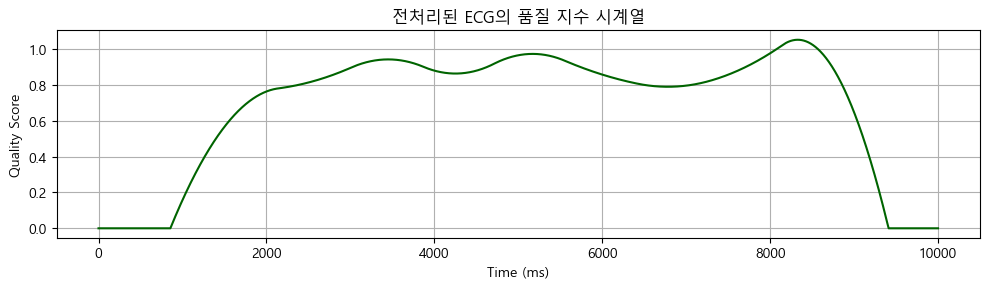

In [ ]:
# 품질 지수 평균 출력
mean_quality = ecg_signals["ECG_Quality"].mean()
print(f"평균 품질 지수: {mean_quality:.3f}")

# 품질 지수 시각화
plt.figure(figsize=(10, 3))
plt.plot(ecg_signals["ECG_Quality"], color='darkgreen')
plt.title("전처리된 ECG의 품질 지수 시계열")
plt.xlabel("Time (ms)")
plt.ylabel("Quality Score")
plt.grid(True)
plt.tight_layout()
plt.show()